In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df.drop(['day','month','year'],axis=1, inplace=True)

In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
## encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [18]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [20]:
## Independent and dependent feature
X = df.drop('FWI',axis=1)
y = df['FWI']

In [22]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [24]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [26]:
# Train test split
from sklearn.model_selection import train_test_split


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [39]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [41]:
### Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


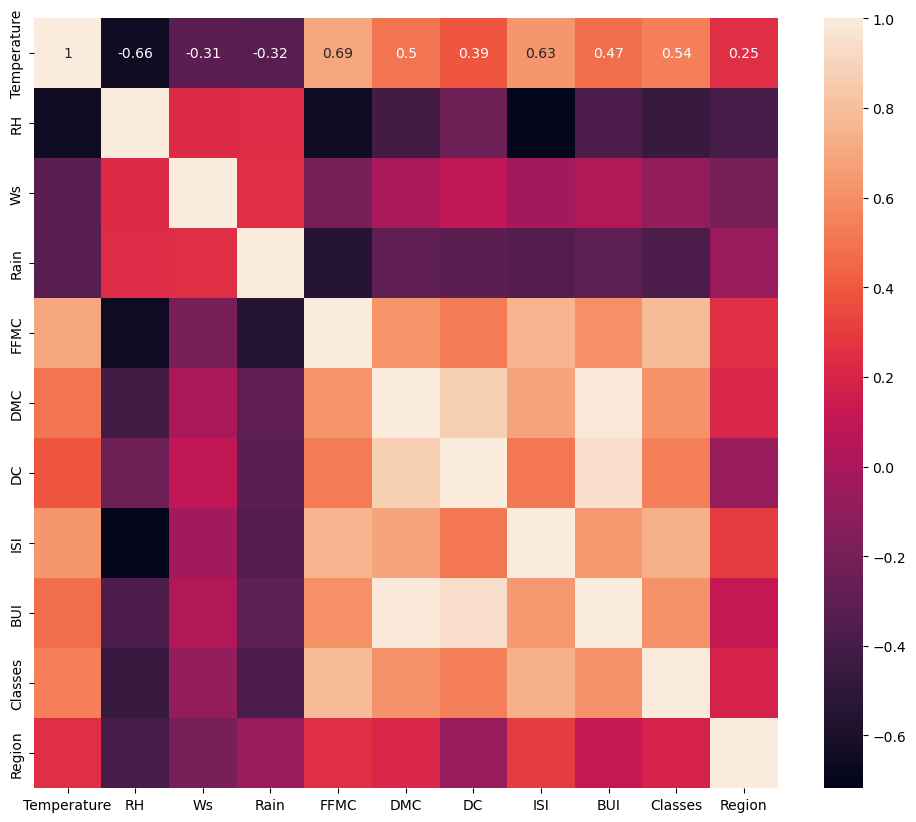

In [45]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True);

In [47]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [55]:
## threshold --> Domain expert
corr_features= correlation(X_train,0.85)

In [57]:
### Drop the features when correlation is more than 0.85
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling or standardization

In [60]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [68]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## BOx plot to understand Effect of StandardScaler

Text(0.5, 1.0, 'X_train After Scaling')

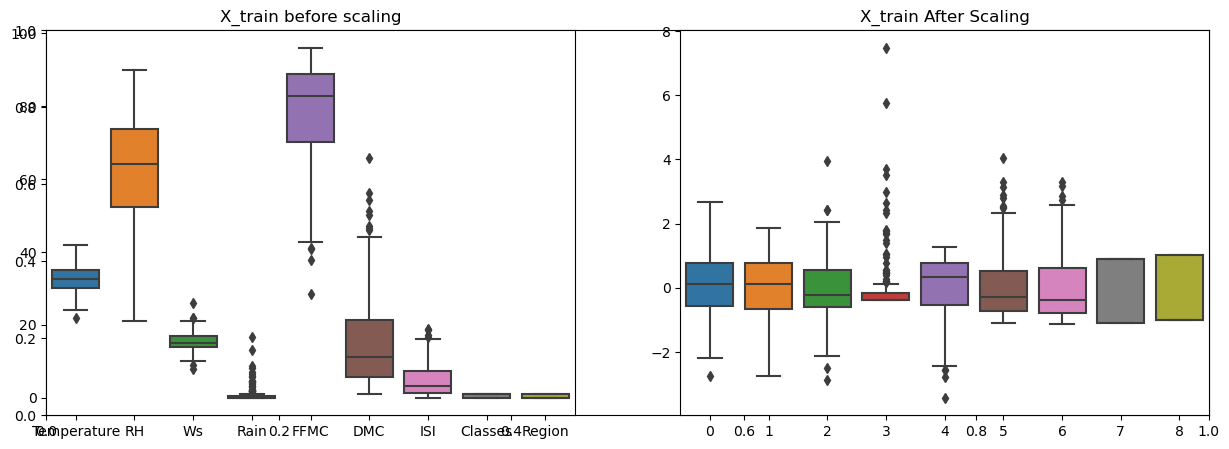

In [73]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

## Linear Regression Model

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [92]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
y_pred = linear_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score", score)

Mean absolute error 0.5468236465249976
R2 Score 0.9847657384266951


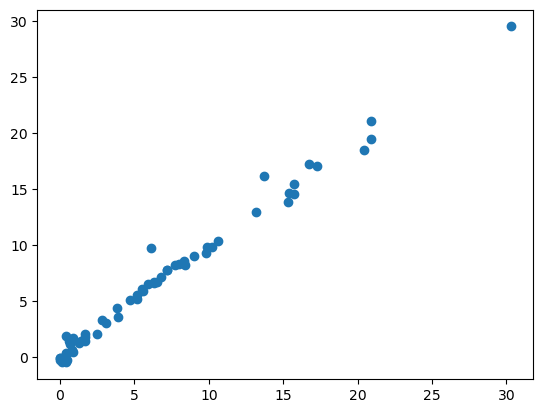

In [98]:
plt.scatter(y_test,y_pred);

## LASSO REGRESSION

Mean Absolute Error 1.1331759949144085
R2_score 0.9492020263112388


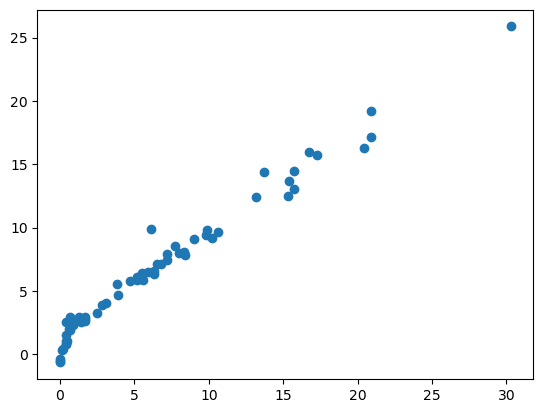

In [120]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso_model = Lasso()
lasso_model.fit(X_train_scaled,y_train)
y_pred1 = lasso_model.predict(X_test_scaled)
mae1=mean_absolute_error(y_test,y_pred1)
score1= r2_score(y_test,y_pred1)
print("Mean Absolute Error",mae1)
print("R2_score",score1)
plt.scatter(y_test,y_pred1);

## Ridge Regression`

Mean Absolute Error 0.5642305340105693
R2_score 0.9842993364555513


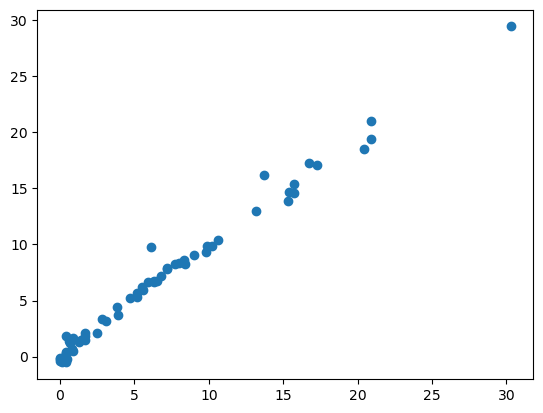

In [118]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)
y_pred1 = ridge_model.predict(X_test_scaled)
mae1=mean_absolute_error(y_test,y_pred1)
score1= r2_score(y_test,y_pred1)
print("Mean Absolute Error",mae1)
print("R2_score",score1)
plt.scatter(y_test,y_pred1);

## Cross Validation lasso

In [125]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(X_train_scaled,y_train)

LassoCV()

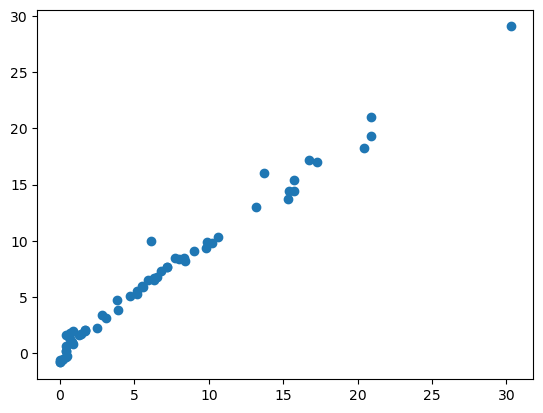

In [137]:
y_pred =lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred);

In [133]:
lassocv.alpha_

0.05725391318234405

In [131]:
lassocv.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

In [135]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

### Pickle the machine learning models, preprocessng model standard scaler

In [140]:
scaler

StandardScaler()

In [144]:
ridge_model

Ridge()

In [146]:
import pickle

In [148]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_model,open('ridge.pkl','wb'))